In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df=pd.read_csv('Cascading_Disasters.csv')

In [3]:
df

,Year,Affected Country,Major Primary Hazard,Major Secondary Hazards
0,1988,Uganda,Earthquake,Flood
1,1990,United States,Storm,Flood
2,1991,Soviet Union,Earthquake,"Flood, Landslide"
3,1991,United States,Storm,"Hail, Flood"
4,1992,Philippines,Flood,Landslide
5,1992,India,Storm,"Flood, Landslide"
6,1993,Japan,Earthquake,"Fire, Tsunami, Landslide"
7,2002,Congo,Volcanic Activity,Earthquake
8,2002,Brazil,Landslide,Flood
9,2003,Japan,Earthquake,Tsunami


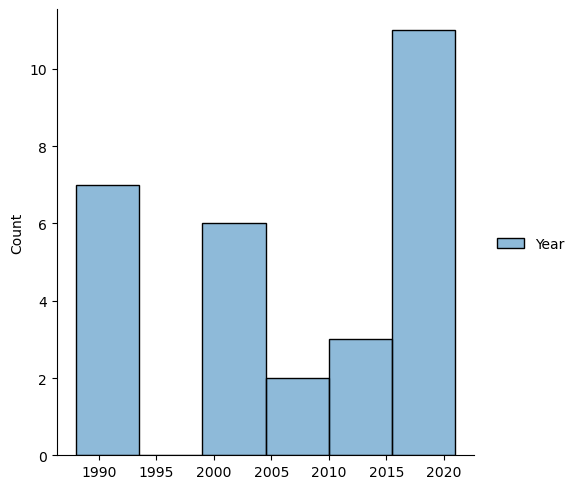

In [4]:
sns.displot(df)

C:\Users\User\AppData\Local\Temp\ipykernel_3752\3021627000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


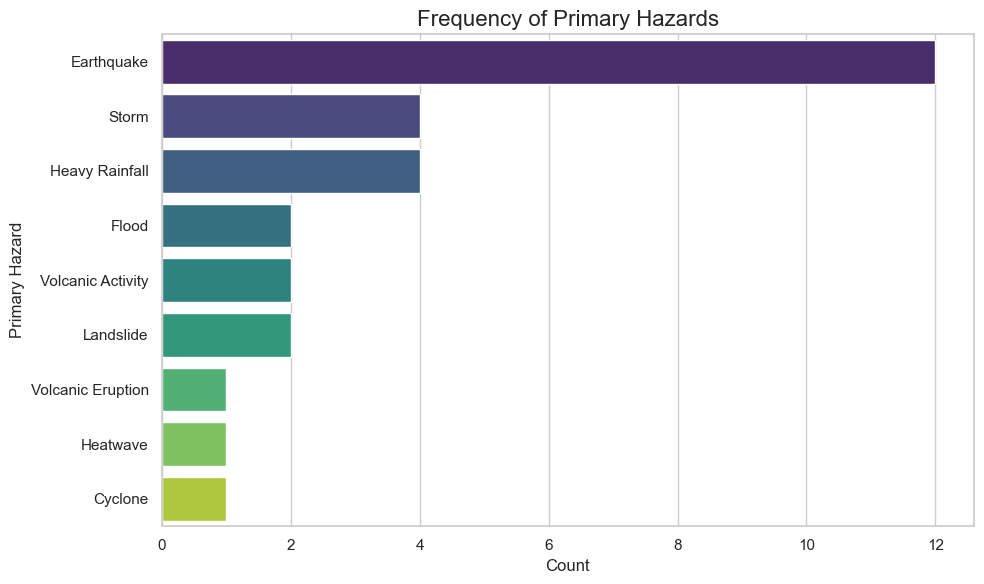

In [5]:
primary_hazard_count = df["Major Primary Hazard"].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(
    x=primary_hazard_count.values, 
    y=primary_hazard_count.index, 
    palette="viridis"
)

# Add labels
plt.title("Frequency of Primary Hazards", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Primary Hazard", fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

# Plot using seaborn

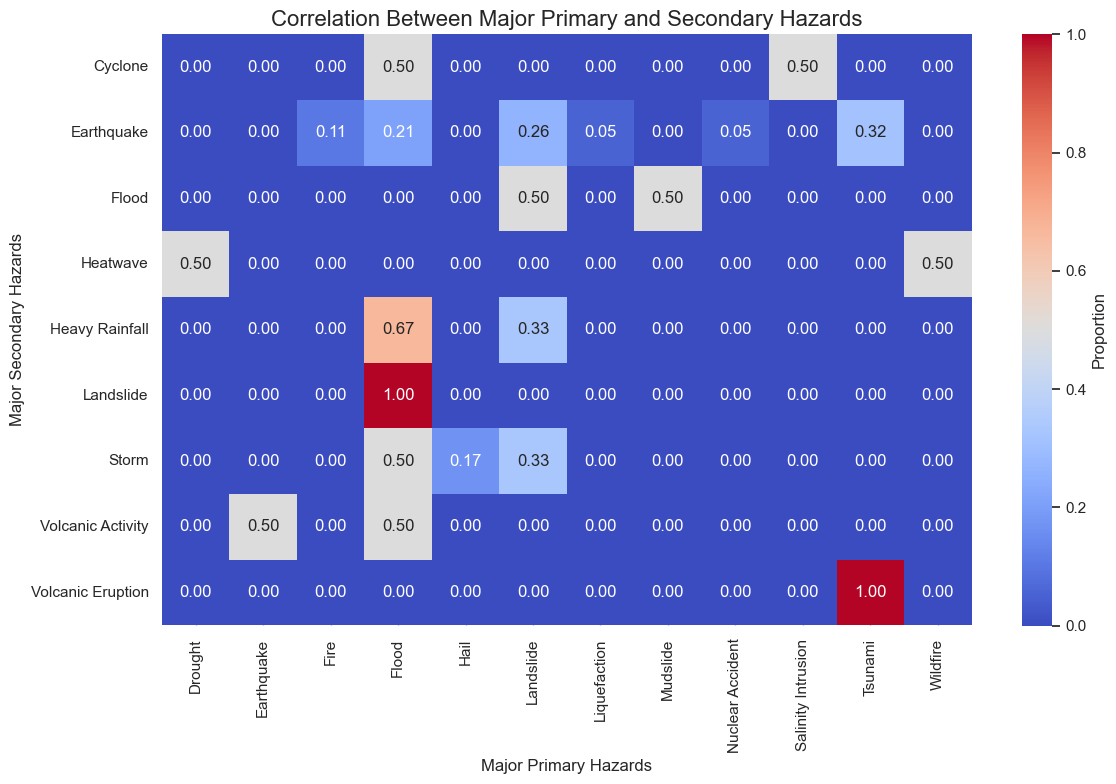

In [6]:
# Explode secondary hazards into multiple rows for better correlation analysis
df_exploded = df.assign(**{"Major Secondary Hazards": df["Major Secondary Hazards"].str.split(", ")}).explode("Major Secondary Hazards")

# Create a heatmap for the correlation between Primary and Secondary Hazards
hazard_correlation = pd.crosstab(
    index=df_exploded["Major Primary Hazard"], 
    columns=df_exploded["Major Secondary Hazards"],
    normalize="index"
)


# Create a crosstab to analyze the correlation between Primary and Secondary Hazards


# Rename columns for clearer understanding
hazard_correlation.columns.name = "Major Primary Hazards"
hazard_correlation.index.name = "Major Secondary Hazards"

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    hazard_correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar_kws={"label": "Proportion"}
)

# Customize labels and title
plt.title("Correlation Between Major Primary and Secondary Hazards", fontsize=16)
plt.xlabel("Major Primary Hazards", fontsize=12)
plt.ylabel("Major Secondary Hazards", fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


Accuracy: 0.44
ROC AUC: 0.40


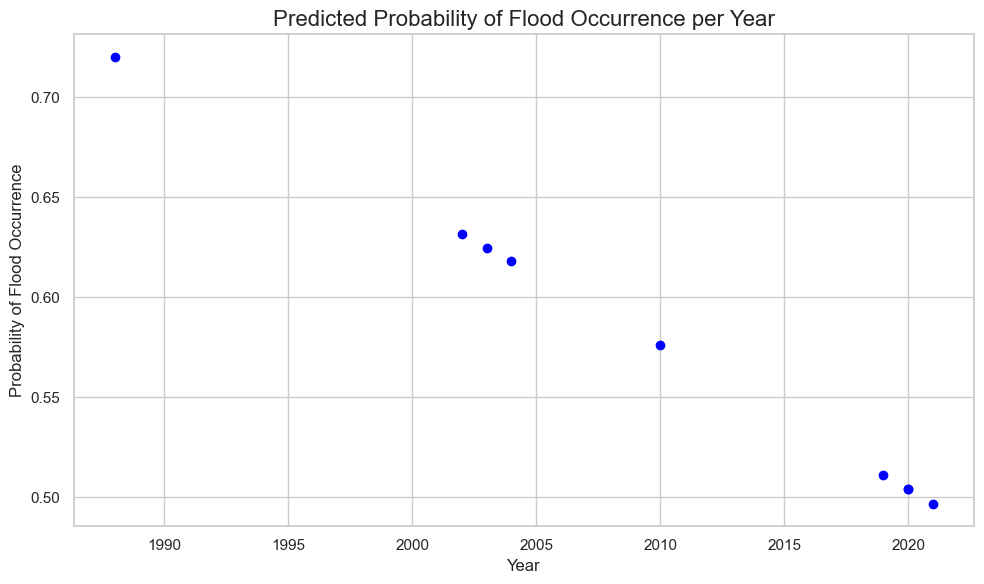

In [7]:

df['Flood_occurred'] = df['Major Primary Hazard'].apply(lambda x: 1 if 'Flood' in x else 0) | df['Major Secondary Hazards'].apply(lambda x: 1 if 'Flood' in x else 0)

# Feature: Year (numerical), Target: Flood_occurred
X = df[['Year']]  # Year as the independent variable
y = df['Flood_occurred']  # Flood occurrence as the dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class (Flood occurred)

# Evaluate the model
accuracy = accuracy_score(y_test, model.predict(X_test))
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot predicted probabilities for each year
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Year'], y_pred_prob, c='blue', label='Predicted Probabilities')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Probability of Flood Occurrence", fontsize=12)
plt.title("Predicted Probability of Flood Occurrence per Year", fontsize=16)
plt.tight_layout()
plt.show()

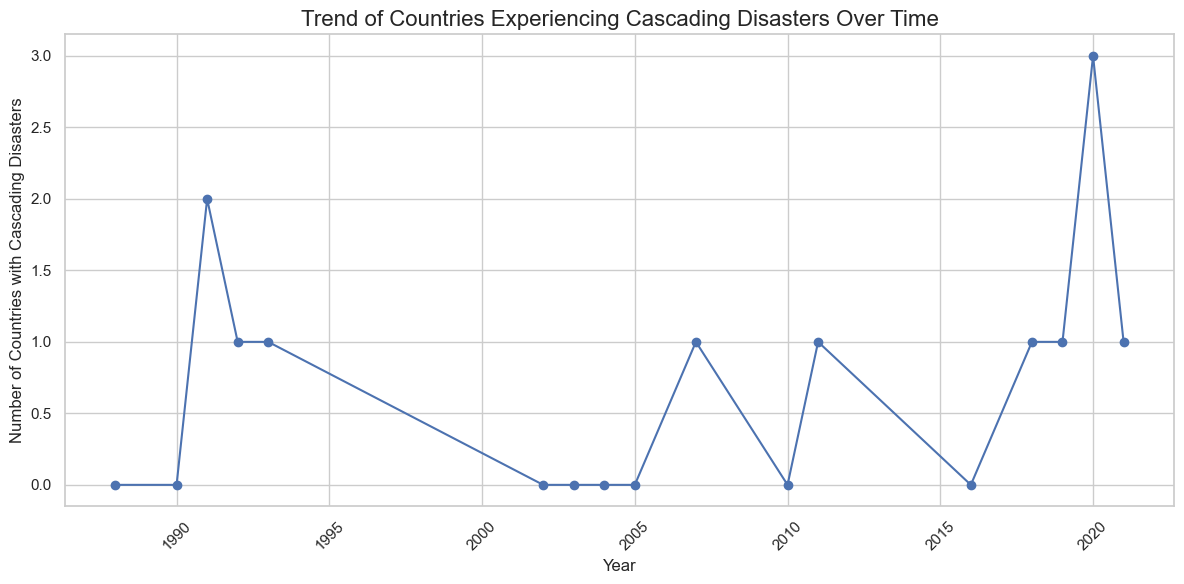

In [8]:
# Identify cascading disasters (both Primary and Secondary Hazards present)
df['Cascading_Disaster'] = df.apply(lambda x: 1 if ',' in x['Major Secondary Hazards'] else 0, axis=1)

# Count the number of countries with cascading disasters per year
cascading_by_year = df.groupby('Year')['Cascading_Disaster'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(cascading_by_year.index, cascading_by_year.values, marker='o', linestyle='-', color='b', label='Countries with Cascading Disasters')
plt.title('Trend of Countries Experiencing Cascading Disasters Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Countries with Cascading Disasters', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

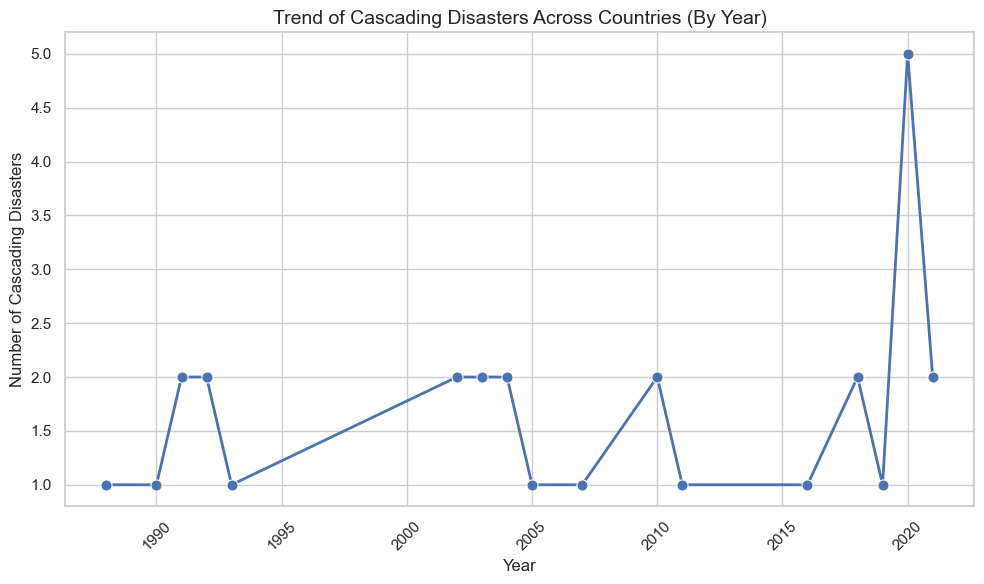

In [9]:
disasters_by_year = df.groupby('Year').size()

# Plotting the trend of cascading disasters by year using seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=disasters_by_year.index, y=disasters_by_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Trend of Cascading Disasters Across Countries (By Year)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cascading Disasters", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

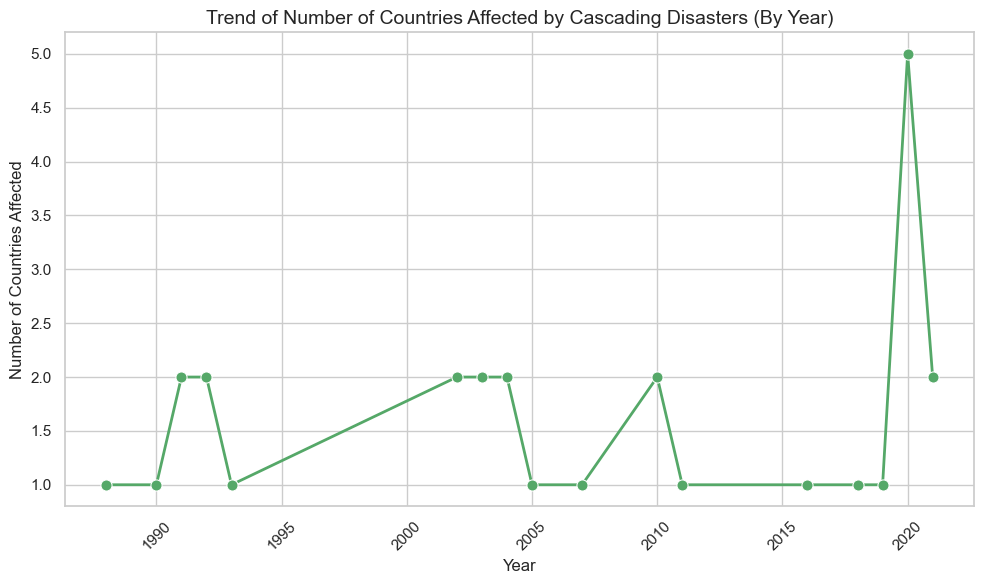

In [10]:
countries_by_year = df.groupby('Year')['Affected Country'].nunique()

# Plotting the trend of the number of countries affected by cascading disasters each year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=countries_by_year.index, y=countries_by_year.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.title("Trend of Number of Countries Affected by Cascading Disasters (By Year)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Countries Affected", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

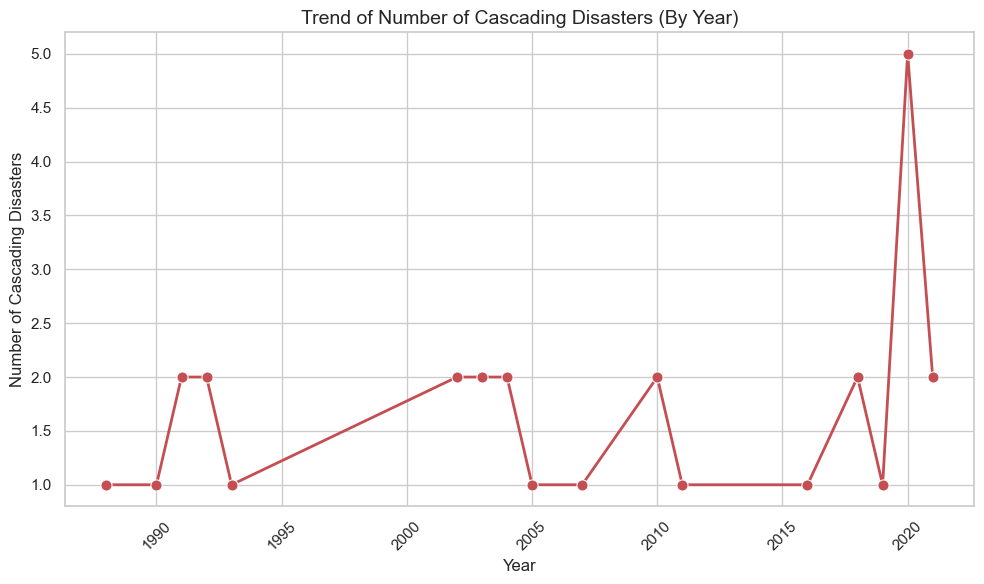

In [11]:
disasters_by_year = df.groupby('Year').size()

# Plotting the trend of cascading disasters by year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=disasters_by_year.index, y=disasters_by_year.values, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)
plt.title("Trend of Number of Cascading Disasters (By Year)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cascading Disasters", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

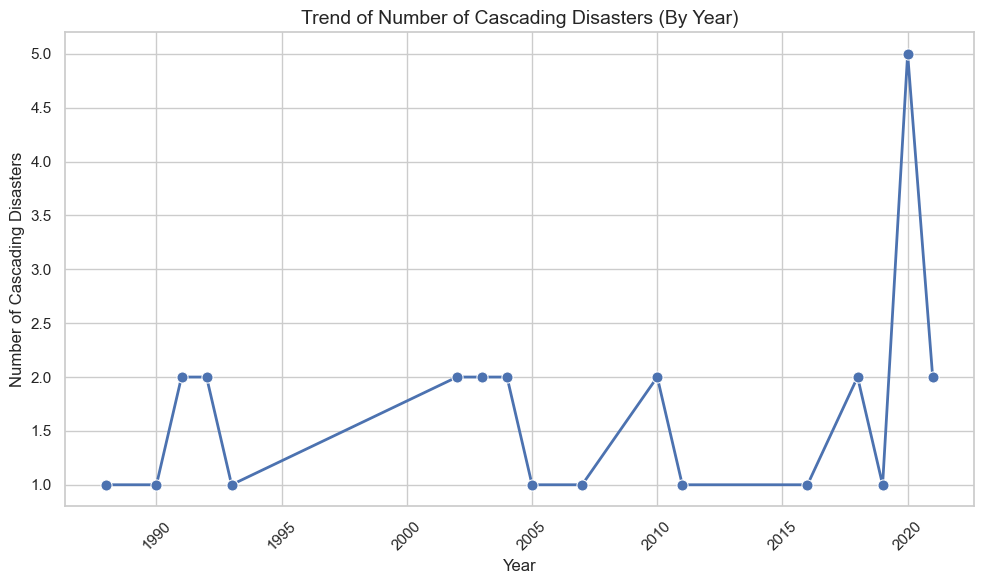

In [12]:
disasters_by_year = df.groupby('Year').size()

# Plotting the trend of the number of cascading disasters by year
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=disasters_by_year.index, y=disasters_by_year.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Trend of Number of Cascading Disasters (By Year)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cascading Disasters", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
prin